In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import color
from skimage import io
from matplotlib.pyplot import imshow
%matplotlib inline

In [5]:
# Imagens Preprocessadas para branco e preto
imagensOriginais = os.listdir("./fotosPreProcessadas/")
list.sort(imagensOriginais)
imagensOriginais = imagensOriginais[1:]
imagensOriginais

['img1.png',
 'img10.png',
 'img11.png',
 'img12.png',
 'img13.png',
 'img14.png',
 'img15.png',
 'img16.png',
 'img17.png',
 'img18.png',
 'img19.png',
 'img2.png',
 'img20.png',
 'img21.png',
 'img22.png',
 'img3.png',
 'img4.png',
 'img5.png',
 'img6.png',
 'img7.png',
 'img8.png',
 'img9.png']

In [6]:
# Variaveis gerais para execucao
# NAO AS SOBREESCREVA

#imagem varia entre as 10 no repositorio
img = imageio.imread("./fotosPreProcessadas/" + imagensOriginais[0])

#Tipo de filtro
    #0 - gaussiano
tipo_de_filtro = 0 

## imagem Original

In [7]:
ishow(img)

NameError: name 'ishow' is not defined

## Espaço de frequencias da Imagem Original

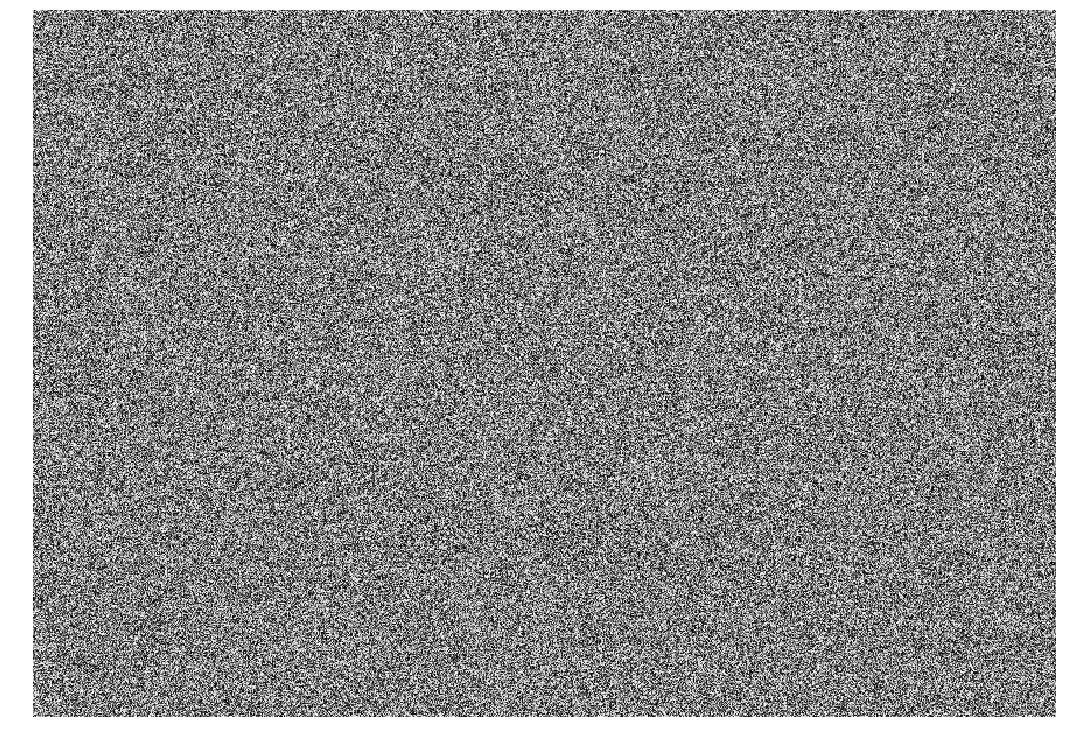

In [12]:
# FFT da imagem original
img_fft = np.fft.fftshift(np.fft.fft2(img))
ishow(img_fft)

## Escolha do filtro

1.0

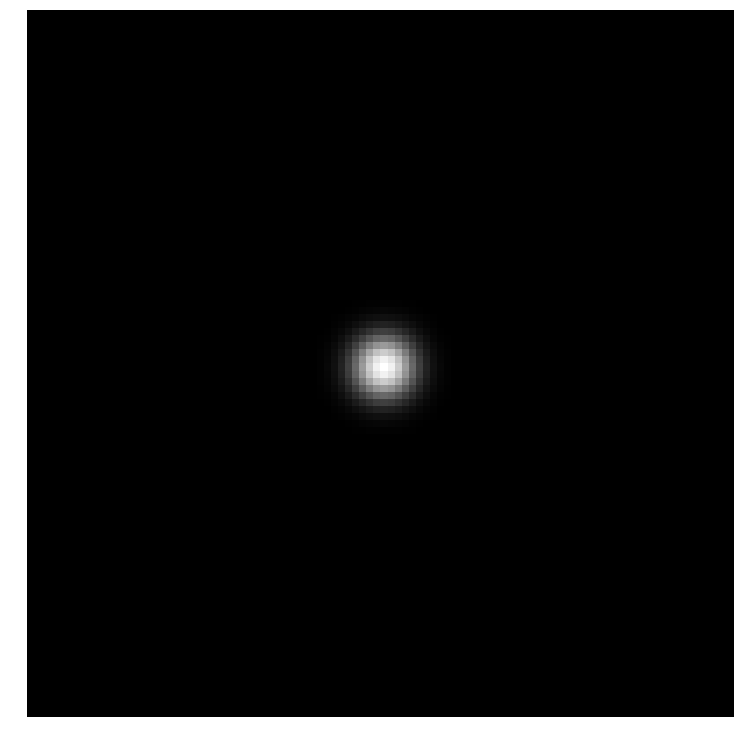

In [20]:
if(tipo_de_filtro == 0):
    filtro = filtro_gaussiano(100,100,3)
ishow_reajustado(filtro)
np.sum(filtro)

## Visualização do filtro no dominio das frequencias

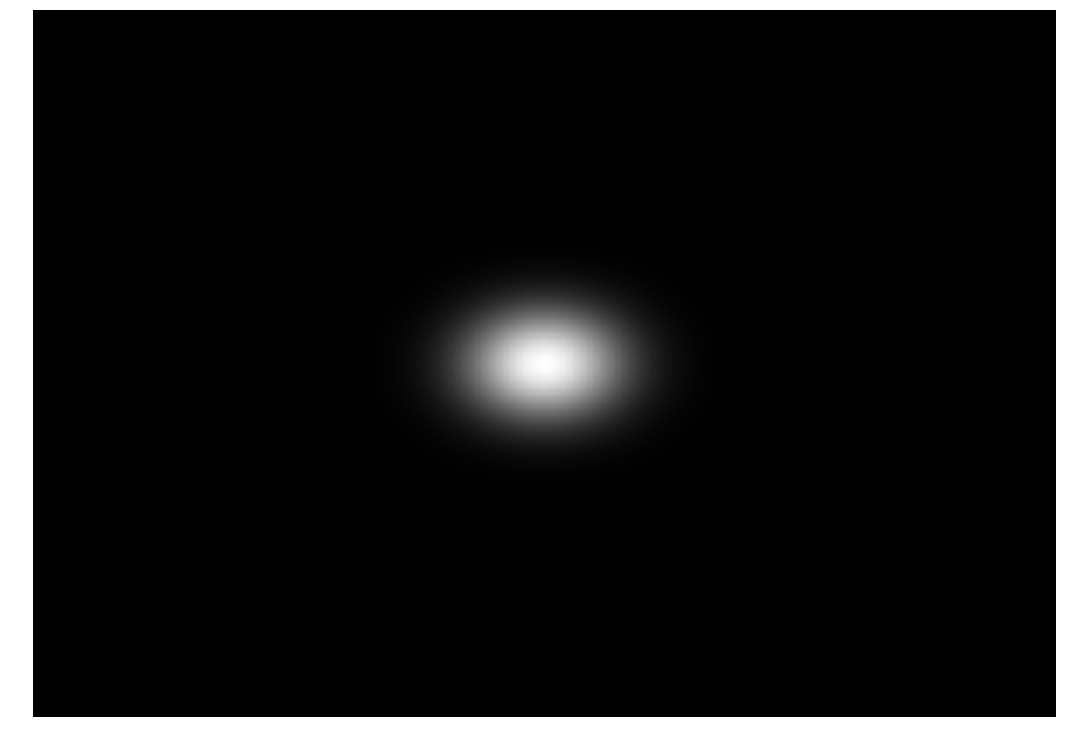

In [18]:
filtro_fft = np.fft.fftshift(np.fft.fft2(filtro))
ishow_reajustado(filtro_fft)

## Visualização da convolução no domínio de frequencias

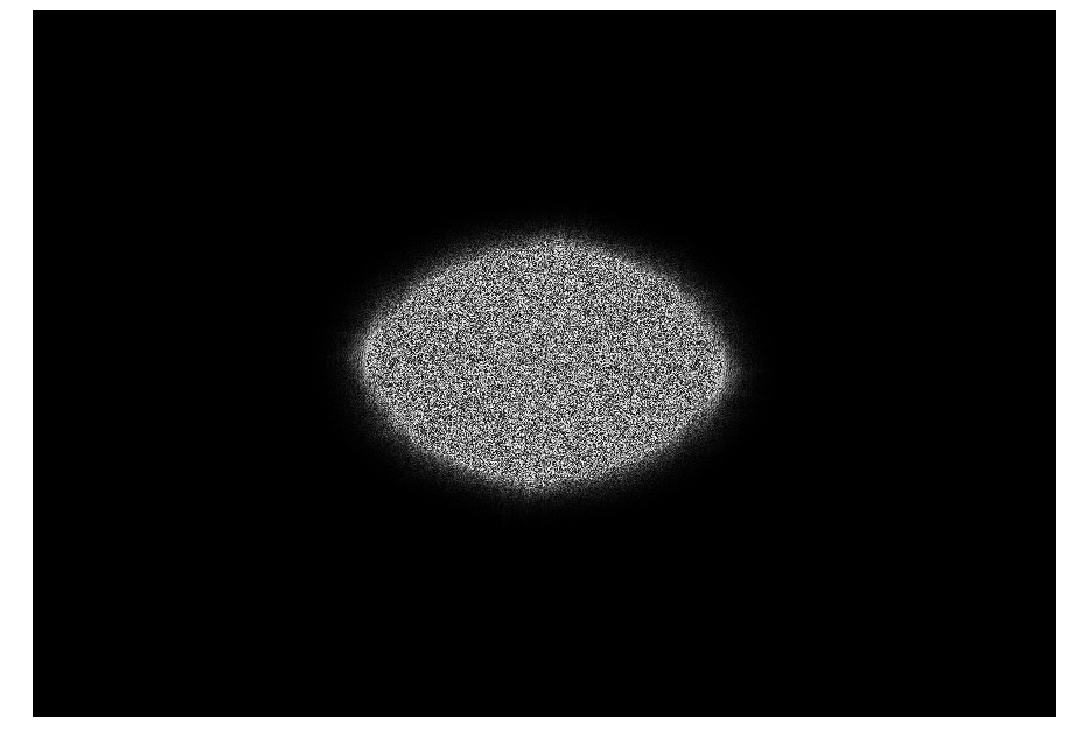

In [19]:
img_convolucionada_fft = img_fft*filtro_fft
ishow(img_convolucionada_fft)

# Visualização da convolução no domínio da imagem

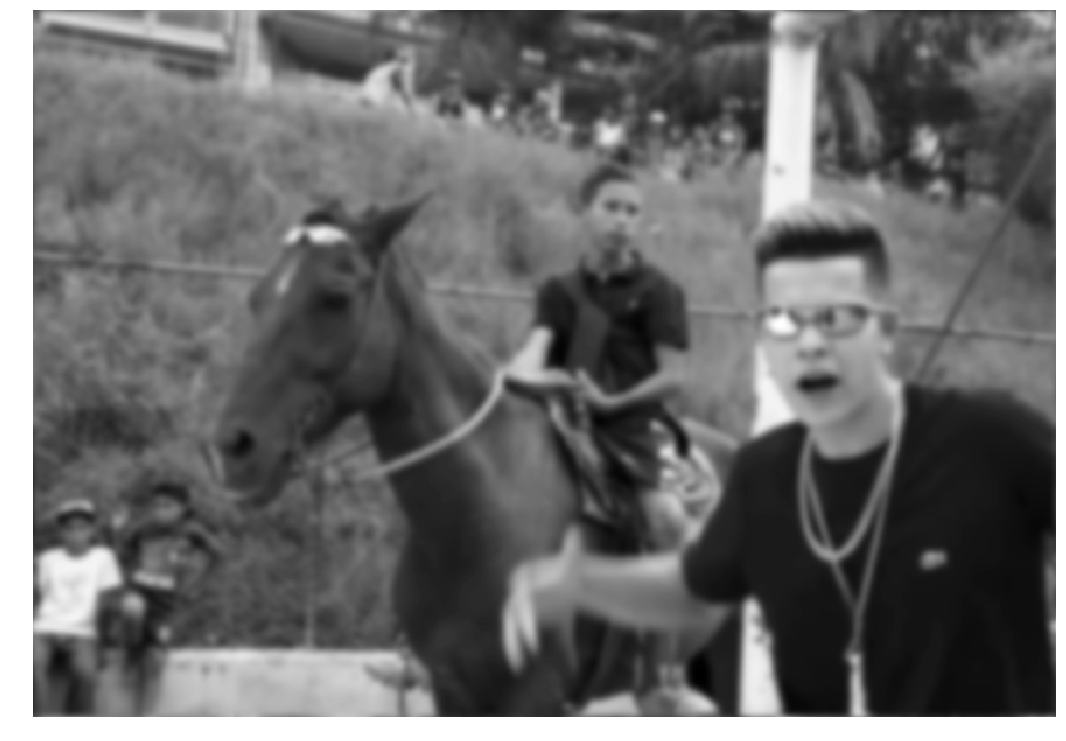

In [22]:
ishow(np.fft.ifftshift(np.fft.ifft2(img_convolucionada_fft)))

# Convolução(filtro+imagem)

In [23]:
import scipy.signal

In [24]:
img_final = scipy.signal.convolve2d(img, filtro)

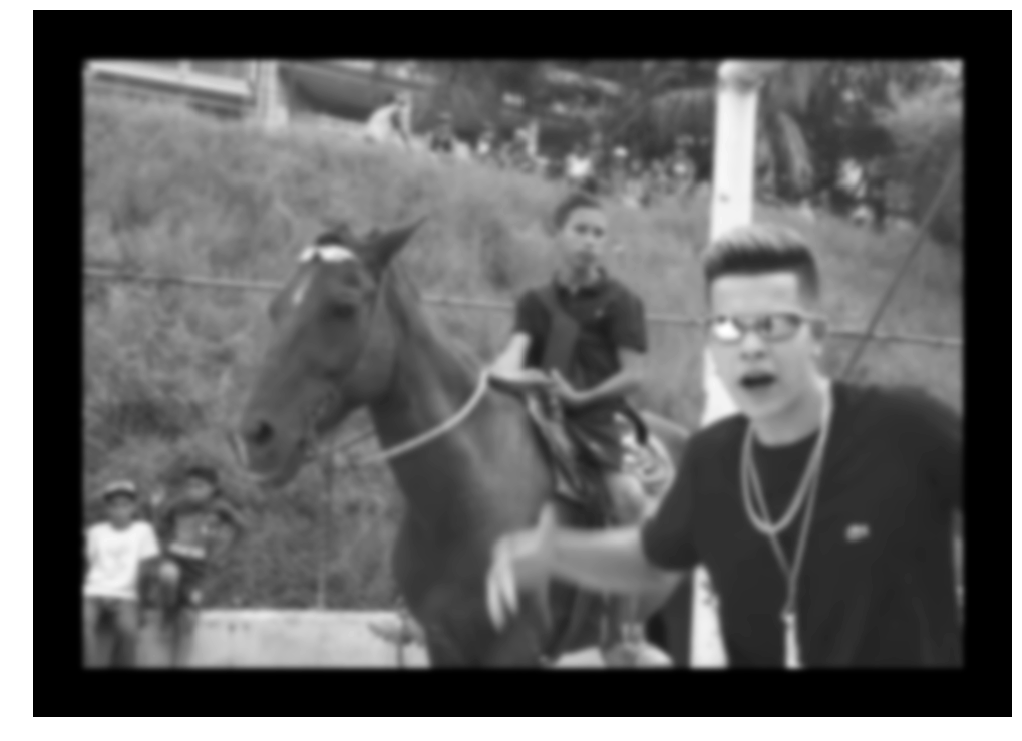

In [25]:
ishow(img_final)

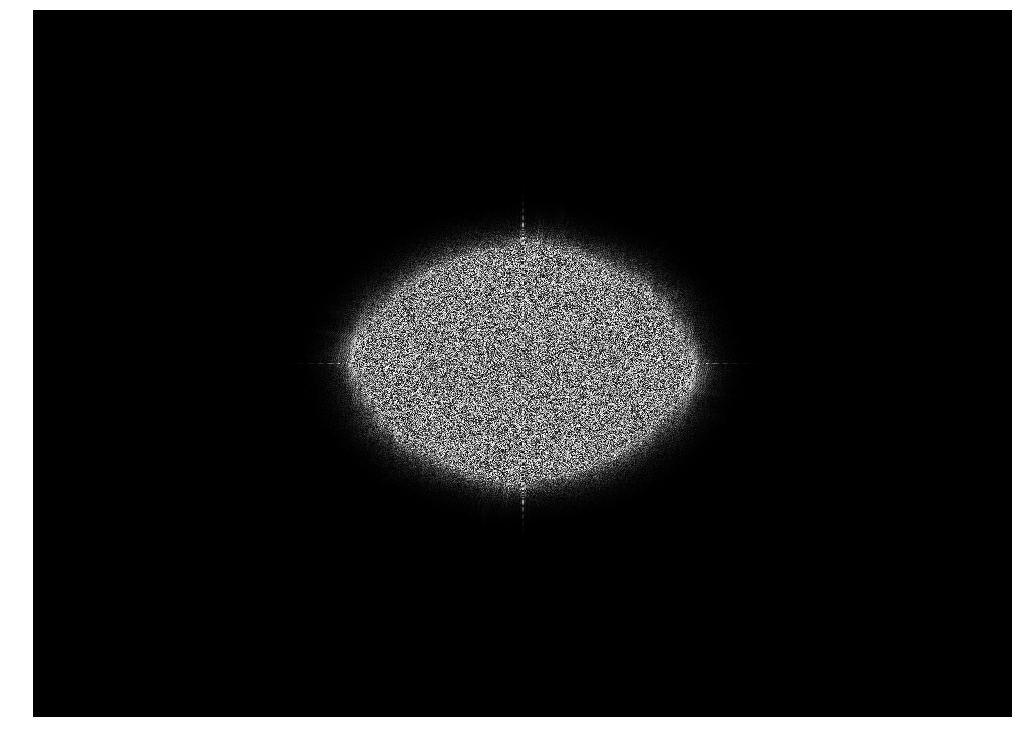

In [26]:
img_final_fft = np.fft.fftshift(np.fft.fft2(img_final))
ishow(img_final_fft)

In [220]:
final_img = np.fft.ifft2(final_fft)

## Mascara utilizada no Espaço de Frequencias

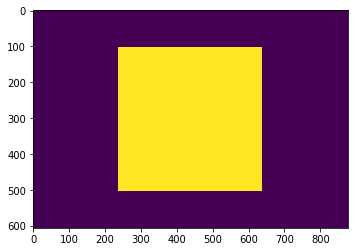

In [158]:
a = np.zeros(fimg.shape)
x = 200
a[int(fimg.shape[0]/2) - x:int(fimg.shape[0]/2) + x,int(fimg.shape[1]/2)- x:int(fimg.shape[1]/2) + x] = 1
b = -(a-1)
imshow(np.asarray(a,np.uint8))

# Espaço de Frequencias com a mascara aplicada

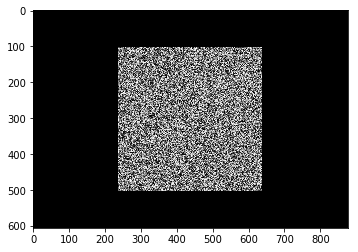

In [39]:
gimg = fimg*a
imshow(np.asarray(abs(gimg),np.uint8),cmap='gray')

## IFFT aplicada no espaço de frequencia com marcara

53291439


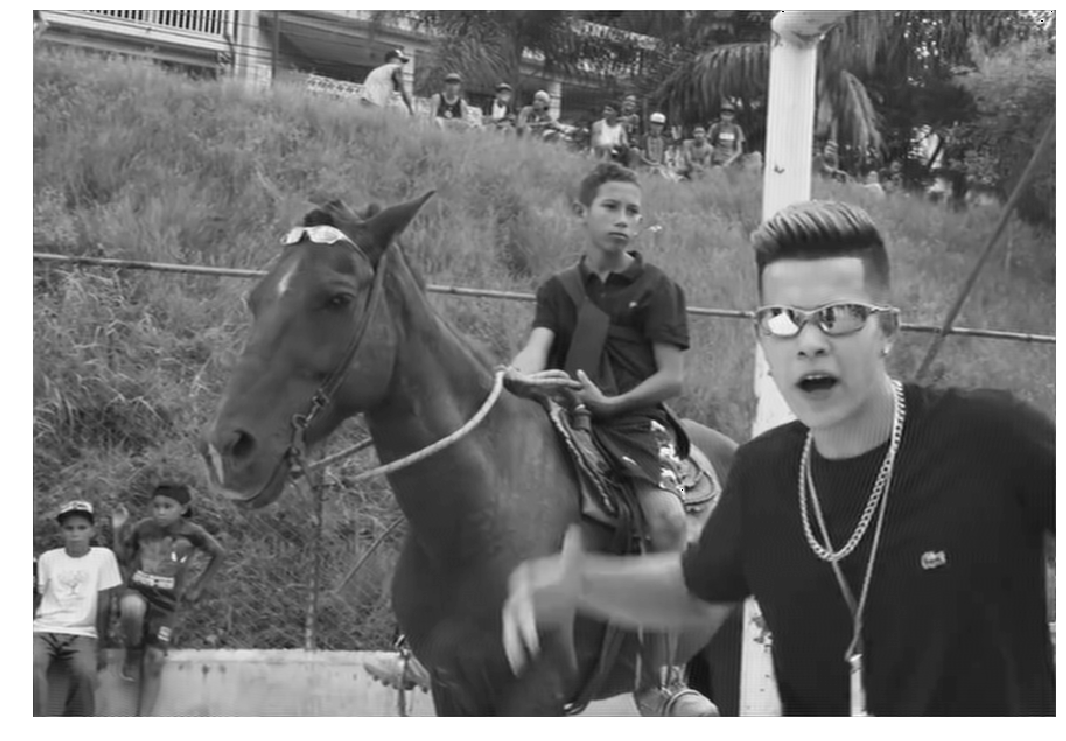

In [42]:
bla = np.fft.ifft2(np.fft.fftshift(gimg))
a =np.asarray(abs(bla),np.uint8)
plt.figure(figsize=(20,13)) 
plt.imshow(a, cmap='gray')
plt.axis('off')
print(np.sum(a))

In [7]:
def ishow(img):
    plt.figure(figsize=(20,13)) 
    plt.imshow(np.asarray(abs(img),np.uint8), cmap='gray')
    plt.axis('off')
    
    
def ishow_reajustado(img):
    plt.figure(figsize=(20,13)) 
    tmp = abs(img)
    tmp = (tmp/np.max(tmp))*255
    plt.imshow(np.asarray(tmp,np.uint8), cmap='gray')
    plt.axis('off')




In [8]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def filtro_gaussiano(w,h,sig):
    filtro = np.zeros((w,h))
    for i in range(0,w):
        for j in range(0,h):
            x = np.ceil(i-w/2)
            y = np.ceil(j-h/2)
            bla = np.sqrt(x*x + y*y)
            filtro[i][j] = gaussian(bla,0,sig)
    return filtro/np.sum(filtro)